In [19]:
# Description: This file contains the code for the post-processing of the
#              dynamics data. The data is read from a folder and then
#              processed to obtain the desired mastered audio files. The
#              data is then saved in a folder.

# Import the necessary modules
import ffmpeg
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import subprocess as sp



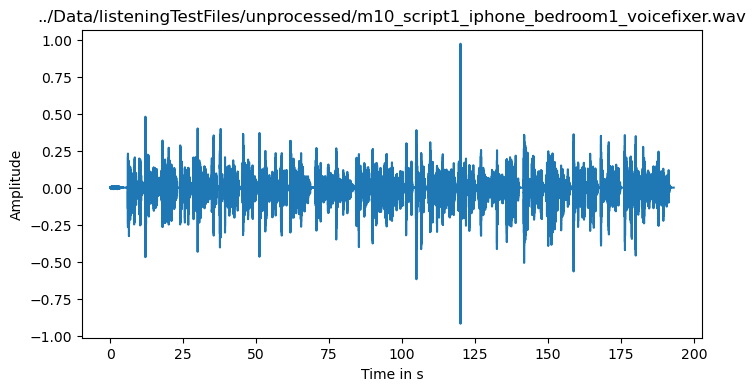

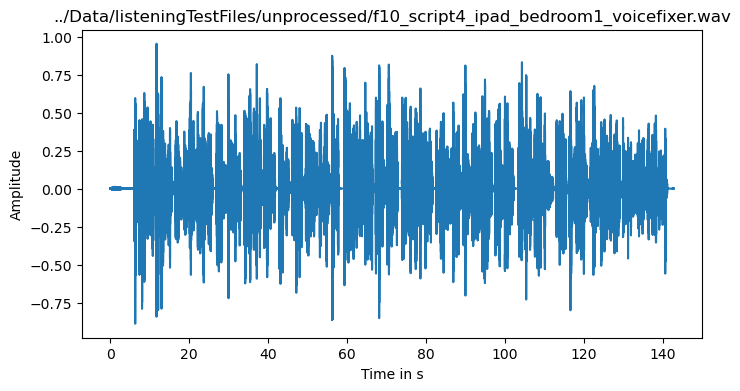

In [41]:

# --------------------------------------------------------------------------- #

# Define the path to the folder containing the unproessed data
path = '../Data/listeningTestFiles/unprocessed/'
# Define the path to the folder where the mastered audio files are to be saved
path_save = '../Data/listeningTestFiles/PP_Dynamics/'

# Get the list of files in the folder
fps = glob.glob(os.path.join(path, '*.wav'))
fps = fps[:2]


for filename in fps:
    # Load the data
   
    # command = [ 'ffmpeg',
    #         '-i', filename,
    #         '-f', 's16le',
    #         '-acodec', 'pcm_s16le',
    #         '-ar', '44100', # ouput will have 44100 Hz
    #         '-ac', '1', # stereo (set to '1' for mono)
    #         '-']
    
    # pipe = sp.Popen(command, stdout=sp.PIPE, bufsize=10**8)

    out, _ = (
    ffmpeg.input(filename, threads=0)
    .output("-", format="s16le", acodec="pcm_s16le", ac=1, ar=44100)
    .run(cmd=["ffmpeg", "-nostdin"], capture_stdout=True, capture_stderr=True)
    )

    # do audio processing with ffmpeg here
    


    audio = np.frombuffer(out, np.int16).flatten().astype(np.float32) / 32768.0

    # plot data 
    plt.figure(figsize=(8, 4))
    x = np.arange(0, len(audio)/44100, 1/44100)
    plt.plot(x, audio)
    plt.title(str(filename))
    plt.xlabel('Time in s')
    plt.ylabel('Amplitude')
    plt.show()


    # plt.figure(figsize=(14, 5))
    # plt.plot(out)
    # plt.show()



